In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [ ]:
temp = ('5','10','20','50','100','200')
os.chdir('/kaggle/working/data')
if os.path.isdir('train/5') is False:
    j=0
    for j in range(6):
        temp[j]
        os.makedirs('train/'+temp[j])
        os.makedirs('valid/'+temp[j])
        os.makedirs('test/'+temp[j])
        counter = 0
        for i in random.sample(glob.glob('../../input/turkish-lira-banknote-dataset/'+temp[j]+'/*'+temp[j]+'_*'), 1000):
            if counter < 600 : shutil.copy(i, 'train/'+temp[j])
            elif counter >= 600 and counter < 800 : shutil.copy(i, 'valid/'+temp[j])
            elif counter >= 800 and counter < 1000 : shutil.copy(i, 'test/'+temp[j])
            counter += 1

os.chdir('../../')

In [ ]:
train_path = 'working/data/train'
valid_path = 'working/data/valid'
test_path = 'working/data/test'

In [3]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [4]:
train_path = 'data/turkish_money/train'
valid_path = 'data/turkish_money/valid'
test_path = 'data/turkish_money/test'

In [14]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10,
  class_mode='categorical')
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), batch_size=10,
  class_mode='categorical')
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), batch_size=10, shuffle=False,
  class_mode='categorical')

Found 3600 images belonging to 6 classes.
Found 1200 images belonging to 6 classes.
Found 1200 images belonging to 6 classes.


In [30]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [31]:
x = mobile.layers[-1].output
output = Dense(units=6, activation='softmax')(x)

In [32]:
model = Model(inputs=mobile.input, outputs=output)

In [33]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [34]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [35]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [36]:
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
model.fit(x=train_batches,
            validation_data=valid_batches,
            epochs=10,
            verbose=2
)

Epoch 1/10
360/360 - 88s - loss: 1.6370 - accuracy: 0.7967 - val_loss: 1.5550 - val_accuracy: 0.7950 - 88s/epoch - 246ms/step
Epoch 2/10
360/360 - 85s - loss: 1.4130 - accuracy: 0.9097 - val_loss: 1.3977 - val_accuracy: 0.7925 - 85s/epoch - 237ms/step
Epoch 3/10
360/360 - 84s - loss: 1.2165 - accuracy: 0.9400 - val_loss: 1.1715 - val_accuracy: 0.8958 - 84s/epoch - 233ms/step
Epoch 4/10
360/360 - 84s - loss: 1.0382 - accuracy: 0.9586 - val_loss: 0.9680 - val_accuracy: 0.9508 - 84s/epoch - 232ms/step
Epoch 5/10
360/360 - 85s - loss: 0.8768 - accuracy: 0.9728 - val_loss: 1.0829 - val_accuracy: 0.7800 - 85s/epoch - 237ms/step
Epoch 6/10
360/360 - 85s - loss: 0.7581 - accuracy: 0.9700 - val_loss: 0.7637 - val_accuracy: 0.9292 - 85s/epoch - 236ms/step
Epoch 7/10
360/360 - 88s - loss: 0.6499 - accuracy: 0.9722 - val_loss: 0.6940 - val_accuracy: 0.9217 - 88s/epoch - 245ms/step
Epoch 8/10
360/360 - 86s - loss: 0.5483 - accuracy: 0.9797 - val_loss: 0.5780 - val_accuracy: 0.9433 - 86s/epoch - 238

In [39]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

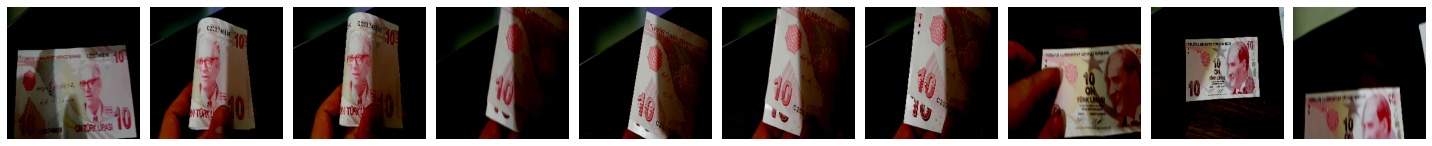

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


In [40]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [41]:
test_batches.classes

array([0, 0, 0, ..., 5, 5, 5])

In [42]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [43]:
np.round(predictions)

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [44]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [45]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [46]:
test_batches.class_indices

{'10': 0, '100': 1, '20': 2, '200': 3, '5': 4, '50': 5}

Confusion matrix, without normalization
[[184   0   2   5   0   9]
 [  0 200   0   0   0   0]
 [  0   0 200   0   0   0]
 [  2   0   0 197   0   1]
 [  1   0   1   0 198   0]
 [  2   0   0   0   0 198]]


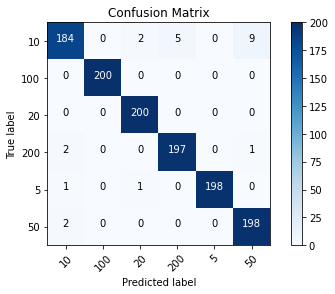

In [49]:
cm_plot_labels = ['10','100','20','200','5','50']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [50]:
import os.path
if os.path.isfile('data/models/para_tanima_model.h5') is False:
    model.save('data/models/para_tanima_model.h5/')

INFO:tensorflow:Assets written to: data/models/para_tanima_model.h5/assets
